In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [15]:
cancer_data = pd.read_csv("../datasets/cancer.csv")
print(cancer_data.shape)
cancer_labels = np.array([1 if l == 'M' else 0 for l in cancer_data['label'].values])
cancer_features = cancer_data.drop(['label'], axis=1).values
cancer_data.head()

(569, 31)


,label,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [74]:
spam_data = pd.read_csv("../datasets/spam.csv")
print(spam_data.shape)
spam_labels = spam_data['label'].values
spam_features = spam_data.drop(['label'], axis=1).values
spam_data.head()

(4601, 58)


,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_:,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,label
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [101]:
def roc(y_pr, y_true):
    tps = []
    fps = []
    gt_true = len(list(filter(lambda x: x == 1, y_true)))
    gt_false = len(list(filter(lambda x: x == 0, y_true)))
    ys = zip(y_pr, y_true)
    ys = sorted(ys)
    true_positive = gt_true
    false_positive = gt_false
    prev_p = None
    i = 0
    while i < len(ys):
        y_p, y_t = ys[i]
        prev_p = y_p
        while i < len(ys) and y_p == prev_p:
            if y_t == 1:
                true_positive -= 1
            if y_t == 0:
                false_positive -= 1
            i += 1
            if i == len(ys):
                break
            y_p, y_t = ys[i]
        prev_p = y_p
        fps.append(false_positive / gt_false)
        tps.append(true_positive / gt_true)
#     print(tps)
#     print(fps)
    return tps[::-1], fps[::-1]

def roc_auc(y_pr, y_true):
    tps, fps = roc(y_pr, y_true)
    prev_tp = tps[0]
    prev_fp = fps[0]
    area = 0
    for tp, fp in zip(tps, fps):
        area += (fp - prev_fp) * (prev_tp + tp) / 2
        prev_tp = tp
        prev_fp = fp
    return area

In [104]:
def top3_features(X, y):
    features_score = [(roc_auc(X[:, i], y), i) for i in range(X.shape[1])]
    top_features = sorted(features_score, reverse=True)[:3]
    print(top_features)
    for auc, i in top_features:
        tps, fps = roc(X[:, i], y)
        plt.plot(fps, tps)
        plt.title(f"{i}-th feature with auc = {round(auc, 4)}")
        plt.show()

cancer
[(0.9726494371333434, 22), (0.967641773690608, 20), (0.9670273769885313, 23)]


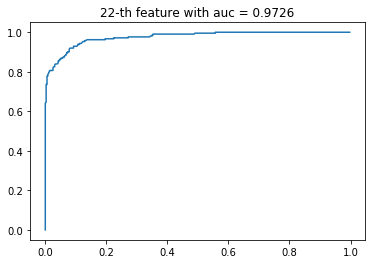

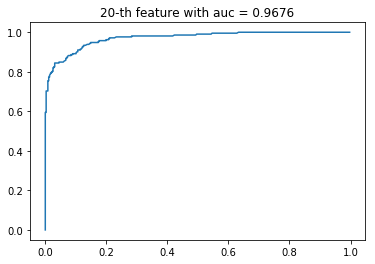

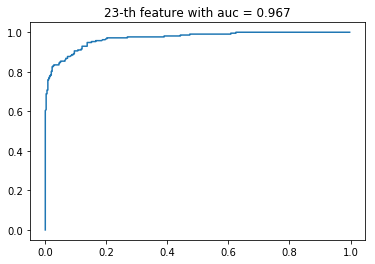

In [105]:
print("cancer")
top3_features(cancer_features, cancer_labels)
# print("spam")
# top3_features(spam_features, spam_labels)

In [110]:
def check_split(X, y):
    _, _, y_tr, y_te = train_test_split(X, y)
    print(np.mean(y_tr), np.mean(y_te))
    
check_split(cancer_features, cancer_labels)

0.3779342723004695 0.35664335664335667
